In [249]:
import pandas as pd
import numpy as np

In [250]:
df = pd.read_csv("/kaggle/input/housing-hw/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

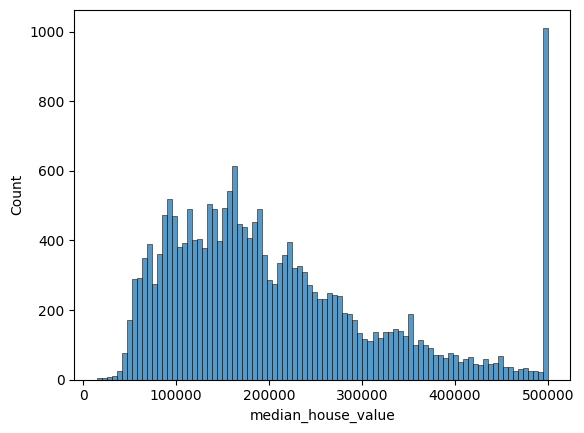

In [252]:
sns.histplot(df.median_house_value, bins=90)

In [253]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [254]:
filter_list=['<1H OCEAN', 'INLAND']

In [255]:
df = df.query('ocean_proximity == @filter_list').copy()

In [256]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN    9136
INLAND       6551
Name: count, dtype: int64

In [257]:
list(df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [258]:
# Next, use only the following columns:

# 'latitude',
# 'longitude',
# 'housing_median_age',
# 'total_rooms',
# 'total_bedrooms',
# 'population',
# 'households',
# 'median_income',
# 'median_house_value'


In [259]:
del df['ocean_proximity']

In [260]:
df.head() ## after finishing the pre-requests

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [261]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [262]:
df.population.median()

1195.0

In [263]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [264]:
np.log1p(df_shuffled.median_house_value.values)

array([12.40942565, 12.39958551, 11.92305302, ..., 12.40205464,
       12.30727904, 11.46058952])

In [265]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [266]:
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [267]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [268]:
def prepare_X(df, feature_to_impute, val_to_subsitute):
    """
    prepare and impute the assigned the feature
    """
    base_features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
         
    df_num = df[base_features].copy()
    
    if (feature_to_impute != ""):

        df_num[feature_to_impute].fillna(val_to_subsitute, inplace=True)
    
    X = df_num.values

    return X

In [269]:
def get_rmse(y_actual, y_predicted):
    se = (y_actual - y_predicted) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [270]:
X_train = prepare_X(df_train, feature_to_impute="total_bedrooms", val_to_subsitute=0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, feature_to_impute="total_bedrooms", val_to_subsitute=0)
y_predict = w0 + X_val.dot(w)

rmse = get_rmse(y_val, y_predict)
print(f"fill with 0 for missing records {round(rmse, 2)}")

fill with 0 for missing records 0.34


In [271]:
mean_of_bedrooms = df_train.total_bedrooms.mean()
X_train_avg = prepare_X(df_train, feature_to_impute="total_bedrooms", val_to_subsitute=mean_of_bedrooms)
w0, w = train_linear_regression(X_train_avg, y_train)

X_val_avg = prepare_X(df_val, feature_to_impute="total_bedrooms", val_to_subsitute=mean_of_bedrooms)
y_predict_avg = w0 + X_val_avg.dot(w)

rmse = get_rmse(y_val, y_predict_avg)
print(f"fill with mean for missing records {round(rmse, 2)}")

fill with mean for missing records 0.34


In [272]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [273]:
X_train = prepare_X(df_train, feature_to_impute="total_bedrooms", val_to_subsitute=0)
X_val = prepare_X(df_val, feature_to_impute="total_bedrooms", val_to_subsitute=0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, get_rmse(y_val, y_pred))

     0 0.33842870067644515
 1e-06 0.3384287040860154
0.0001 0.33842904190381734
 0.001 0.338432136862011
  0.01 0.3384653418922947
   0.1 0.33894015866313565
     1 0.34294277439211973
     5 0.34603216867815406
    10 0.346652396925549


In [274]:
def prepare_data(df, s, target):
    nRows = len(df)
    idx = np.arange(nRows)
    np.random.seed(s)

    np.random.shuffle(idx)

    nRows_val = int(nRows * 0.2)
    nRows_test = int(nRows * 0.2)
    nRows_train = nRows - nRows_val - nRows_test

    df_train = df.iloc[idx[: nRows_train]]
    df_val = df.iloc[idx[nRows_train : nRows_train + nRows_val]]
    df_test = df.iloc[idx[nRows_train + nRows_val : ]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    X_train = prepare_X(df_train, feature_to_impute= "total_bedrooms",val_to_subsitute = 0)
    X_val = prepare_X(df_val, feature_to_impute= "total_bedrooms",val_to_subsitute = 0)
    X_test = prepare_X(df_test, feature_to_impute= "total_bedrooms",val_to_subsitute = 0)
    
    y_train = np.log1p(df_train[target].values)
    y_val = np.log1p(df_val[target].values)
    y_test = np.log1p(df_test[target].values)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [275]:
def get_best_seed_value():   
    seed_list = []
    bias_list = [] 
    error_list = []
    
    seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    target = 'median_house_value'
    
    for s in seeds:
        
        #get numpy arrays from df
        #we use copy of df so that nothing gets messed up
        X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df.copy(), s, target)

        #train the model
        w0, w = train_linear_regression(X_train, y_train)

        #perform predictions
        y_pred = w0 + X_val.dot(w)

        score = get_rmse(y_val, y_pred)

        seed_list.append(s)
        bias_list.append(w0)
        error_list.append(score)
        
    return pd.DataFrame({'seed': seed_list,'W0': bias_list,'RMSE': error_list })

In [276]:
seed_info = get_best_seed_value()
seed_info

,seed,W0,RMSE
0,0,-9.870069,0.337739
1,1,-9.114011,0.337800
2,2,-9.911560,0.338429
3,3,-10.233184,0.332005
4,4,-9.174763,0.339445
5,5,-10.006648,0.343382
6,6,-10.039903,0.338533
7,7,-10.353545,0.346875
8,8,-9.899416,0.351274
9,9,-9.964622,0.334156


In [277]:
round(np.std(seed_info.RMSE),3)

0.005

In [278]:
def prepare_final_data_for_model(df, s, target):
    nRows = len(df)
    idx = np.arange(nRows)
    np.random.seed(s)

    np.random.shuffle(idx)

    nRows_val = int(nRows * 0.2)
    nRows_test = int(nRows * 0.2)
    nRows_train = nRows - nRows_val - nRows_test

    df_train = df.iloc[idx[: nRows_train]]
    df_val = df.iloc[idx[nRows_train : nRows_train + nRows_val]]
    df_test = df.iloc[idx[nRows_train + nRows_val : ]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    df_full_train = pd.concat([df_train, df_val])
    df_full_train = df_full_train.reset_index(drop=True)

    X_full_train = prepare_X(df_full_train, feature_to_impute= "total_bedrooms",val_to_subsitute = 0)
    X_test = prepare_X(df_test, feature_to_impute= "total_bedrooms",val_to_subsitute = 0)
    
    y_full_train = np.log1p(df_full_train[target].values)
    y_test = np.log1p(df_test[target].values)
    
    return X_full_train, X_test, y_full_train, y_test

In [279]:
X_full_train, X_test, y_full_train, y_test = prepare_final_data_for_model(df.copy(), s=9, target= 'median_house_value')
w0, w =  train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

y_pred = w0 + X_test.dot(w)

rmse = get_rmse(y_test, y_pred)

print("Bias:{0} and RMSE:{1}".format(round(w0,2), round(rmse,2)))

Bias:-9.72 and RMSE:0.33
